<a href="https://colab.research.google.com/github/DS4SD/docling/blob/main/docs/examples/pictures_description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -q docling[vlm] ipython

Note: you may need to restart the kernel to use updated packages.


In [1]:
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.document_converter import DocumentConverter, PdfFormatOption

In [2]:
# The source document
DOC_SOURCE = "https://arxiv.org/pdf/2501.17887"

---

## Describe pictures with Granite Vision

This section will run locally the [ibm-granite/granite-vision-3.1-2b-preview](https://huggingface.co/ibm-granite/granite-vision-3.1-2b-preview) model to describe the pictures of the document.

In [3]:
from docling.datamodel.pipeline_options import granite_picture_description

pipeline_options = PdfPipelineOptions()
pipeline_options.do_picture_description = True
pipeline_options.picture_description_options = (
    granite_picture_description  # <-- the model choice
)
pipeline_options.picture_description_options.prompt = (
    "Describe the image in three sentences. Be consise and accurate."
)
pipeline_options.images_scale = 2.0
pipeline_options.generate_picture_images = True

converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_options=pipeline_options,
        )
    }
)
doc = converter.convert(DOC_SOURCE).document

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


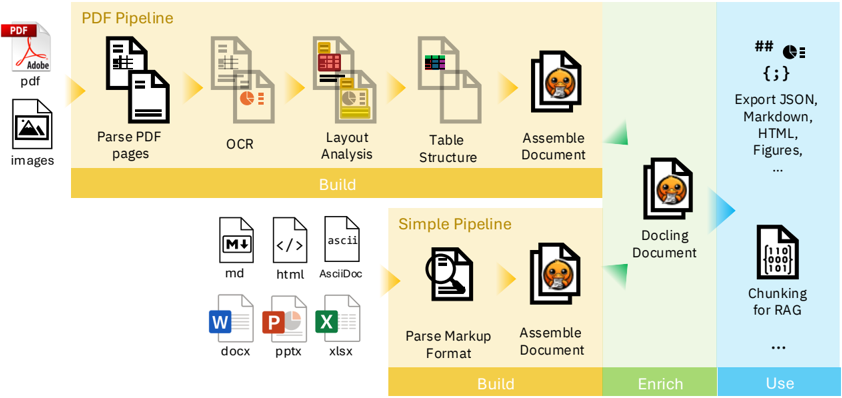
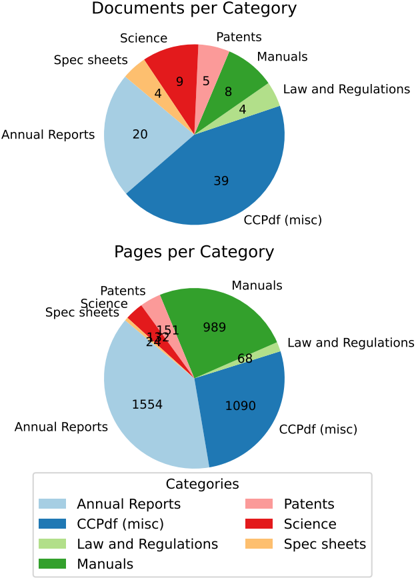
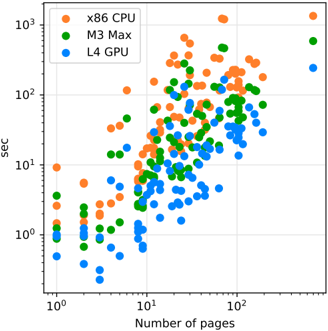
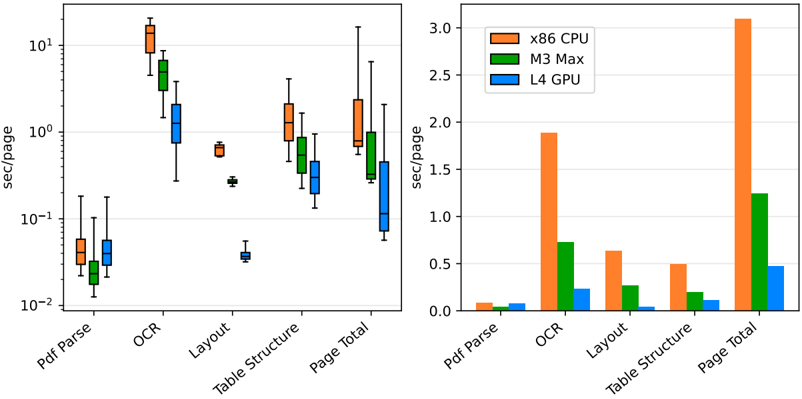
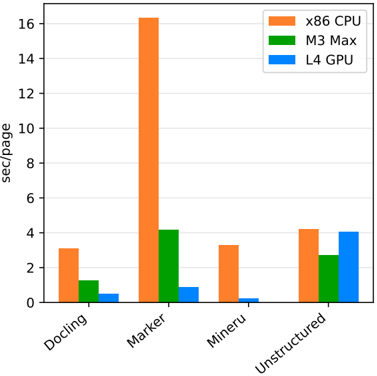

In [4]:
from docling_core.types.doc.document import PictureDescriptionData
from IPython import display

html_buffer = []
# display the first 5 pictures and their captions and annotations:
for pic in doc.pictures[:5]:
    html_item = (
        f"<h3>Picture <code>{pic.self_ref}</code></h3>"
        f'<img src="{str(pic.image.uri)}" /><br />'
        f"<h4>Caption</h4>{pic.caption_text(doc=doc)}<br />"
    )
    for annotation in pic.annotations:
        if not isinstance(annotation, PictureDescriptionData):
            continue
        html_item += (
            f"<h4>Annotations ({annotation.provenance})</h4>{annotation.text}<br />\n"
        )
    html_buffer.append(html_item)
display.HTML("<hr />".join(html_buffer))

---

## Describe pictures with SmolVLM

This section will run locally the [HuggingFaceTB/SmolVLM-256M-Instruct](https://huggingface.co/HuggingFaceTB/SmolVLM-256M-Instruct) model to describe the pictures of the document.

In [7]:
from docling.datamodel.pipeline_options import smolvlm_picture_description

pipeline_options = PdfPipelineOptions()
pipeline_options.do_picture_description = True
pipeline_options.picture_description_options = (
    smolvlm_picture_description  # <-- the model choice
)
pipeline_options.picture_description_options.prompt = (
    "Describe the image in three sentences. Be consise and accurate."
)
pipeline_options.images_scale = 2.0
pipeline_options.generate_picture_images = True

converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_options=pipeline_options,
        )
    }
)
doc = converter.convert(DOC_SOURCE).document


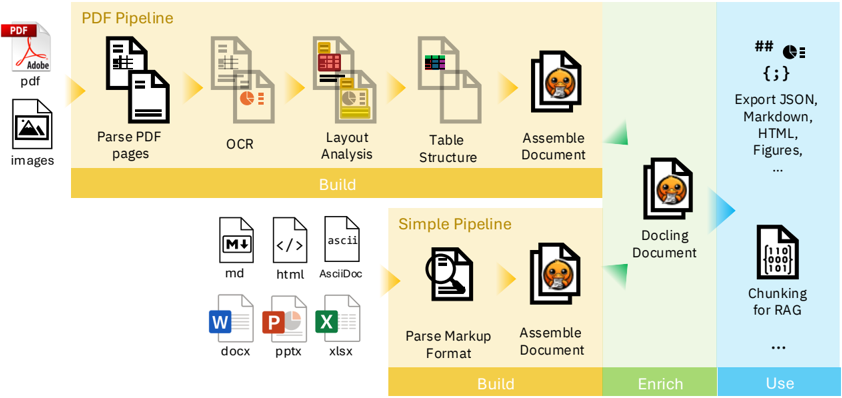
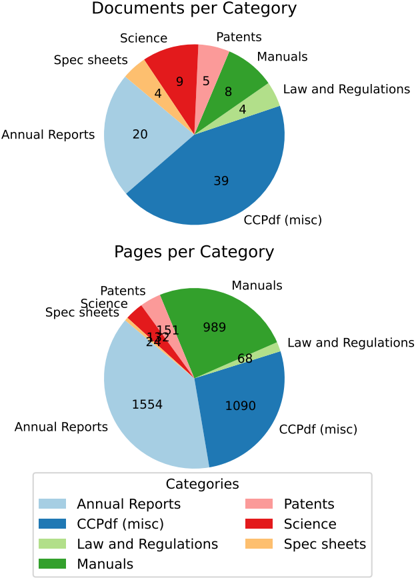
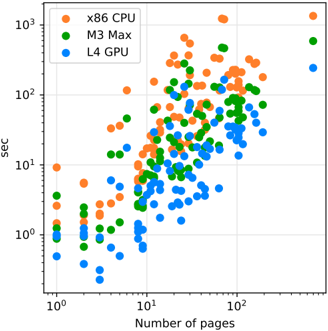
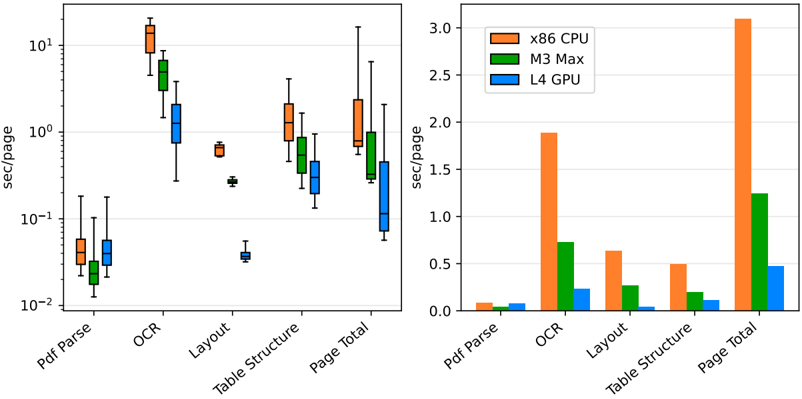
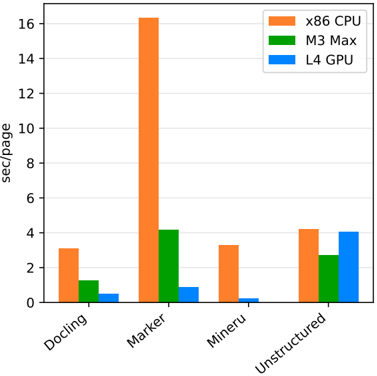

In [6]:
from docling_core.types.doc.document import PictureDescriptionData
from IPython import display

html_buffer = []
# display the first 5 pictures and their captions and annotations:
for pic in doc.pictures[:5]:
    html_item = (
        f"<h3>Picture <code>{pic.self_ref}</code></h3>"
        f'<img src="{str(pic.image.uri)}" /><br />'
        f"<h4>Caption</h4>{pic.caption_text(doc=doc)}<br />"
    )
    for annotation in pic.annotations:
        if not isinstance(annotation, PictureDescriptionData):
            continue
        html_item += (
            f"<h4>Annotations ({annotation.provenance})</h4>{annotation.text}<br />\n"
        )
    html_buffer.append(html_item)
display.HTML("<hr />".join(html_buffer))

---

## Use other vision models

The examples above can also be reproduced using other vision model.
The Docling options `PictureDescriptionVlmOptions` allows to speficy your favorite vision model from the Hugging Face Hub.

In [8]:
from docling.datamodel.pipeline_options import PictureDescriptionVlmOptions

pipeline_options = PdfPipelineOptions()
pipeline_options.do_picture_description = True
pipeline_options.picture_description_options = PictureDescriptionVlmOptions(
    repo_id="",  # <-- add here the Hugging Face repo_id of your favorite VLM
    prompt="Describe the image in three sentences. Be consise and accurate.",
)
pipeline_options.images_scale = 2.0
pipeline_options.generate_picture_images = True

converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_options=pipeline_options,
        )
    }
)

# Uncomment to run:
# doc = converter.convert(DOC_SOURCE).document